## Основни примери за Pandas

Овај бележник ће вас провести кроз неке веома основне концепте Pandas-а. Почећемо са увозом типичних библиотека за науку о подацима:


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Серије

Серије су сличне листи или једнодимензионалном низу, али имају индекс. Све операције су поравнате са индексом.


In [37]:
a = pd.Series(range(1,10))
b = pd.Series(["I","like","to","use","Python","and","Pandas","very","much"],index=range(0,9))
print(a,b)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64 0         I
1      like
2        to
3       use
4    Python
5       and
6    Pandas
7      very
8      much
dtype: object


Једна од честих употреба серија је **временска серија**. У временским серијама, индекс има посебну структуру - обично је то распон датума или временских ознака. Такав индекс можемо креирати помоћу `pd.date_range`.

Претпоставимо да имамо серију која приказује количину производа купљену сваког дана, и знамо да сваке недеље такође треба да узмемо један артикал за себе. Ево како то можемо моделирати користећи серије:


Length of index is 366


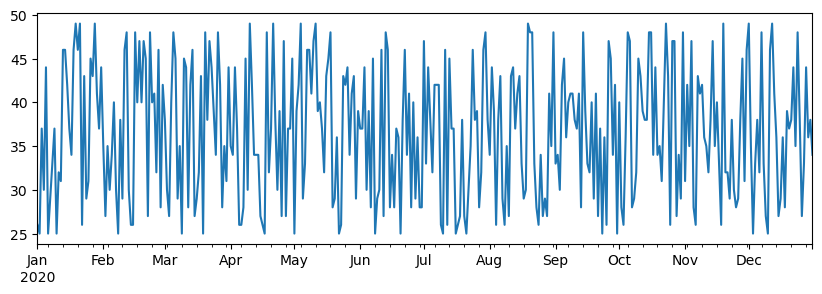

In [38]:
start_date = "Jan 1, 2020"
end_date = "Dec 31, 2020"
idx = pd.date_range(start_date,end_date)
print(f"Length of index is {len(idx)}")
items_sold = pd.Series(np.random.randint(25,50,size=len(idx)),index=idx)
items_sold.plot(figsize=(10,3))
plt.show()

In [39]:
additional_items = pd.Series(10,index=pd.date_range(start_date,end_date,freq="W"))
print(f"Additional items (10 item each week):\n{additional_items}")
total_items = items_sold+additional_items
print(f"Total items (sum of two series):\n{total_items}")

Additional items (10 item each week):
2020-01-05    10
2020-01-12    10
2020-01-19    10
2020-01-26    10
2020-02-02    10
2020-02-09    10
2020-02-16    10
2020-02-23    10
2020-03-01    10
2020-03-08    10
2020-03-15    10
2020-03-22    10
2020-03-29    10
2020-04-05    10
2020-04-12    10
2020-04-19    10
2020-04-26    10
2020-05-03    10
2020-05-10    10
2020-05-17    10
2020-05-24    10
2020-05-31    10
2020-06-07    10
2020-06-14    10
2020-06-21    10
2020-06-28    10
2020-07-05    10
2020-07-12    10
2020-07-19    10
2020-07-26    10
2020-08-02    10
2020-08-09    10
2020-08-16    10
2020-08-23    10
2020-08-30    10
2020-09-06    10
2020-09-13    10
2020-09-20    10
2020-09-27    10
2020-10-04    10
2020-10-11    10
2020-10-18    10
2020-10-25    10
2020-11-01    10
2020-11-08    10
2020-11-15    10
2020-11-22    10
2020-11-29    10
2020-12-06    10
2020-12-13    10
2020-12-20    10
2020-12-27    10
Freq: W-SUN, dtype: int64
Total items (sum of two series):
2020-01-01     NaN


Као што видите, овде имамо проблеме, јер се у недељној серији дани који нису поменути сматрају недостајућим (`NaN`), а додавање `NaN` броју даје `NaN`. Да бисмо добили тачан резултат, потребно је да наведемо `fill_value` приликом сабирања серија:


2020-01-01    26.0
2020-01-02    25.0
2020-01-03    37.0
2020-01-04    30.0
2020-01-05    54.0
              ... 
2020-12-27    43.0
2020-12-28    44.0
2020-12-29    36.0
2020-12-30    38.0
2020-12-31    34.0
Length: 366, dtype: float64


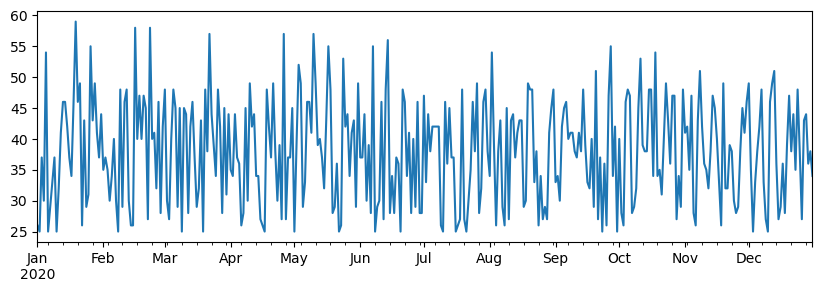

In [40]:
total_items = items_sold.add(additional_items,fill_value=0)
print(total_items)
total_items.plot(figsize=(10,3))
plt.show()

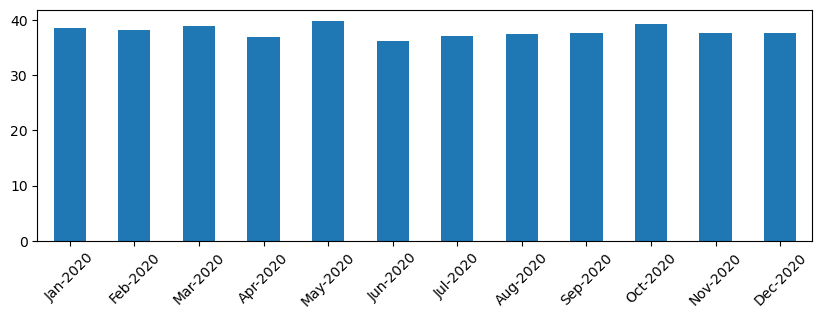

In [41]:
monthly = total_items.resample("1M").mean()
ax = monthly.plot(kind='bar',figsize=(10,3))
ax.set_xticklabels([x.strftime("%b-%Y") for x in monthly.index], rotation=45)
plt.show()

## DataFrame

DataFrame је у суштини збирка серија са истим индексом. Можемо комбиновати неколико серија заједно у један DataFrame. Дате су серије `a` и `b` дефинисане изнад:


In [42]:
df = pd.DataFrame([a,b])
df

0     1   2    3       4    5       6     7     8
0  1     2   3    4       5    6       7     8     9
1  I  like  to  use  Python  and  Pandas  very  much

Можемо такође користити серије као колоне и одредити називе колона користећи речник:


In [43]:
df = pd.DataFrame({ 'A' : a, 'B' : b })
df

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

Исти резултат се може постићи транспоновањем (а затим преименовањем колона, како би одговарале претходном примеру):


In [44]:
pd.DataFrame([a,b]).T.rename(columns={ 0 : 'A', 1 : 'B' })

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

**Избор колона** из DataFrame-а може се урадити овако:


In [45]:
print(f"Column A (series):\n{df['A']}")
print(f"Columns B and A (DataFrame):\n{df[['B','A']]}")

Column A (series):
0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: A, dtype: int64
Columns B and A (DataFrame):
        B  A
0       I  1
1    like  2
2      to  3
3     use  4
4  Python  5
5     and  6
6  Pandas  7
7    very  8
8    much  9


**Избор редова** на основу израза за филтрирање:


In [46]:
df[df['A']<5]

A     B
0  1     I
1  2  like
2  3    to
3  4   use

Начин на који то функционише је да израз `df['A']<5` враћа булову серију, која указује да ли је израз `True` или `False` за сваки елемент серије. Када се серија користи као индекс, она враћа подскуп редова у DataFrame-у. Стога није могуће користити произвољан Python булов израз, на пример, писање `df[df['A']>5 and df['A']<7]` било би погрешно. Уместо тога, требало би да користите специјалну `&` операцију на буловим серијама:


In [47]:
df[(df['A']>5) & (df['A']<7)]

A    B
5  6  and

**Креирање нових израчунљивих колона**. Лако можемо креирати нове израчунљиве колоне за наш DataFrame коришћењем интуитивних израза. Код испод израчунава одступање А од његове просечне вредности.


In [48]:
df['DivA'] = df['A']-df['A'].mean()
df

A       B  DivA
0  1       I  -4.0
1  2    like  -3.0
2  3      to  -2.0
3  4     use  -1.0
4  5  Python   0.0
5  6     and   1.0
6  7  Pandas   2.0
7  8    very   3.0
8  9    much   4.0

Шта се заправо дешава је да израчунавамо низ, а затим додељујемо тај низ левој страни, стварајући још једну колону.


In [49]:
# WRONG: df['ADescr'] = "Low" if df['A'] < 5 else "Hi"
df['LenB'] = len(df['B']) # Wrong result

In [50]:
df['LenB'] = df['B'].apply(lambda x: len(x))
# or
df['LenB'] = df['B'].apply(len)
df

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6
5  6     and   1.0     3
6  7  Pandas   2.0     6
7  8    very   3.0     4
8  9    much   4.0     4

**Избор редова на основу бројева** може се извршити коришћењем конструкције `iloc`. На пример, за избор првих 5 редова из DataFrame-а:


In [52]:
df.iloc[:5]

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

**Груписање** се често користи да би се добио резултат сличан *пивот табелама* у Excel-у. Претпоставимо да желимо да израчунамо средњу вредност колоне `A` за сваки дати број `LenB`. Тада можемо груписати наш DataFrame по `LenB`, и позвати `mean`:


In [53]:
df.groupby(by='LenB').mean()

A      DivA
LenB                    
1     1.000000 -4.000000
2     3.000000 -2.000000
3     5.000000  0.000000
4     6.333333  1.333333
6     6.000000  1.000000

Ако треба да израчунамо просек и број елемената у групи, онда можемо користити сложенију функцију `aggregate`:


In [58]:
df.groupby(by='LenB') \
 .aggregate({ 'DivA' : len, 'A' : lambda x: x.mean() }) \
 .rename(columns={ 'DivA' : 'Count', 'A' : 'Mean'})

Count      Mean
LenB                 
1         1  1.000000
2         1  3.000000
3         2  5.000000
4         3  6.333333
6         2  6.000000

## Штампање и графички приказ

Научници за податке често морају да истражују податке, па је важно да могу да их визуализују. Када је DataFrame велики, често желимо само да се уверимо да све радимо исправно тако што ћемо одштампати првих неколико редова. Ово се може урадити позивом `df.head()`. Ако га покрећете из Jupyter Notebook-а, он ће приказати DataFrame у лепом табеларном облику.


In [59]:
df.head()

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

Такође смо видели употребу функције `plot` за визуализацију неких колона. Иако је `plot` веома користан за многе задатке и подржава различите типове графикона преко параметра `kind=`, увек можете користити основну библиотеку `matplotlib` за цртање нечег сложенијег. Детаљно ћемо обрадити визуализацију података у посебним лекцијама курса.


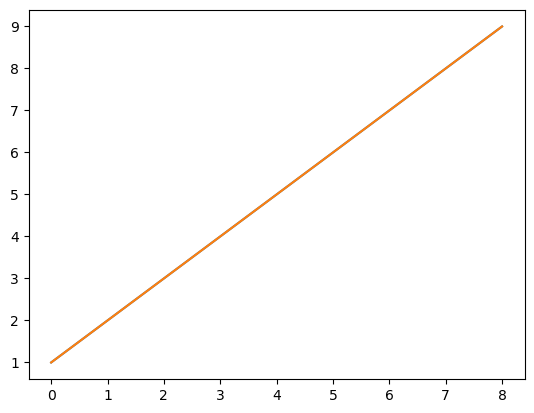

In [61]:
df['A'].plot()
plt.show()

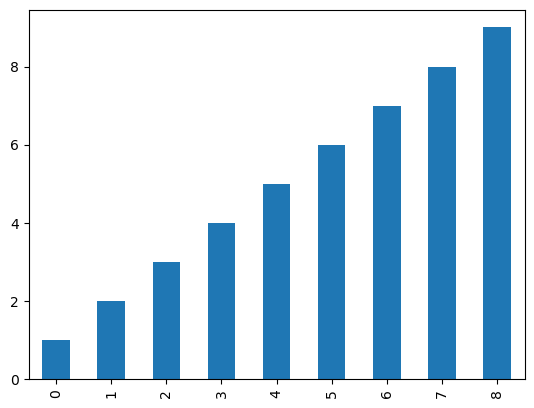

In [63]:
df['A'].plot(kind='bar')
plt.show()

Овај преглед обухвата најважније концепте библиотеке Pandas, међутим, библиотека је веома богата и нема граница ономе што можете урадити са њом! Хајде сада да применимо ово знање за решавање одређеног проблема.



---

**Одрицање од одговорности**:  
Овај документ је преведен коришћењем услуге за превођење помоћу вештачке интелигенције [Co-op Translator](https://github.com/Azure/co-op-translator). Иако настојимо да обезбедимо тачност, молимо вас да имате у виду да аутоматски преводи могу садржати грешке или нетачности. Оригинални документ на изворном језику треба сматрати ауторитативним извором. За критичне информације препоручује се професионални превод од стране људи. Не сносимо одговорност за било каква погрешна тумачења или неспоразуме који могу произаћи из коришћења овог превода.
